In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df=pd.read_csv('/content/cleaned_ipl_data.csv')

In [18]:
df.head(10)

,matchID,match,team,battingPos,batsman,out_status,runs,balls,4s,6s,SR
0,T203817,CSK VS KKR,CSK,1,Ruturaj Gaikwad,O,32,27,3,1,118.51
1,T203817,CSK VS KKR,CSK,2,Fafdu Plessis,O,86,59,7,3,145.76
2,T203817,CSK VS KKR,CSK,3,Robin Uthappa,O,31,15,0,3,206.66
3,T203817,CSK VS KKR,CSK,4,Moeen Ali,NO,37,20,2,3,185.00
4,T203817,CSK VS KKR,KKR,1,Shubman Gill,O,51,43,6,0,118.60
5,T203817,CSK VS KKR,KKR,2,Venkatesh Iyer,O,50,32,5,3,156.25
6,T203817,CSK VS KKR,KKR,3,Nitish Rana,O,0,1,0,0,0.00
7,T203817,CSK VS KKR,KKR,4,Sunil Narine,O,2,2,0,0,100.00
8,T203817,CSK VS KKR,KKR,5,Eoin Morgan,O,4,8,0,0,50.00
9,T203817,CSK VS KKR,KKR,6,Dinesh Karthik,O,9,7,0,1,128.57


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   matchID     3268 non-null   object 
 1   match       3268 non-null   object 
 2   team        3268 non-null   object 
 3   battingPos  3268 non-null   int64  
 4   batsman     3268 non-null   object 
 5   out_status  3268 non-null   object 
 6   runs        3268 non-null   int64  
 7   balls       3268 non-null   int64  
 8   4s          3268 non-null   int64  
 9   6s          3268 non-null   int64  
 10  SR          3268 non-null   float64
dtypes: float64(1), int64(5), object(5)
memory usage: 281.0+ KB


In [20]:
df1=df.select_dtypes(include='object')

In [21]:
df1.head(5)

,matchID,match,team,batsman,out_status
0,T203817,CSK VS KKR,CSK,Ruturaj Gaikwad,O
1,T203817,CSK VS KKR,CSK,Fafdu Plessis,O
2,T203817,CSK VS KKR,CSK,Robin Uthappa,O
3,T203817,CSK VS KKR,CSK,Moeen Ali,NO
4,T203817,CSK VS KKR,KKR,Shubman Gill,O


In [22]:
df2=df.select_dtypes(include=['int','float'])

In [23]:
df2.head(5)

,battingPos,runs,balls,4s,6s,SR
0,1,32,27,3,1,118.51
1,2,86,59,7,3,145.76
2,3,31,15,0,3,206.66
3,4,37,20,2,3,185.00
4,1,51,43,6,0,118.60


In [24]:
obj_columns=df1.columns
num_columns=df2.columns

In [25]:
print(obj_columns)
print(num_columns)

Index(['matchID', 'match', 'team', 'batsman', 'out_status'], dtype='object')
Index(['battingPos', 'runs', 'balls', '4s', '6s', 'SR'], dtype='object')


In [26]:
df2

,battingPos,runs,balls,4s,6s,SR
0,1,32,27,3,1,118.51
1,2,86,59,7,3,145.76
2,3,31,15,0,3,206.66
3,4,37,20,2,3,185.00
4,1,51,43,6,0,118.60
...,...,...,...,...,...,...
3263,3,22,17,3,0,129.41
3264,4,8,11,0,0,72.72
3265,5,27,21,2,1,128.57
3266,6,15,14,1,1,107.14


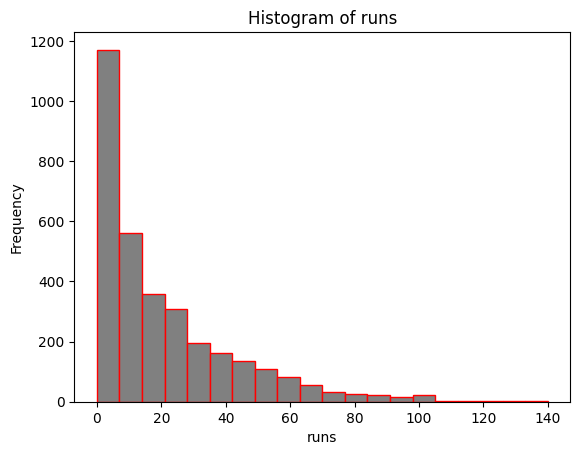

In [27]:
plt.hist(df2['runs'],bins=20,edgecolor='r',color='grey')
plt.xlabel('runs')
plt.ylabel('Frequency')
plt.title('Histogram of runs')
plt.show()

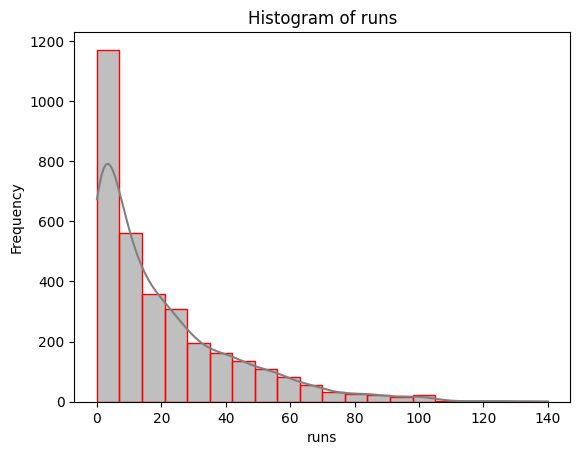

In [28]:
sns.histplot(df2['runs'],bins=20,edgecolor='r',color='grey' , kde=True)
plt.xlabel('runs')
plt.ylabel('Frequency')
plt.title('Histogram of runs')
plt.show()

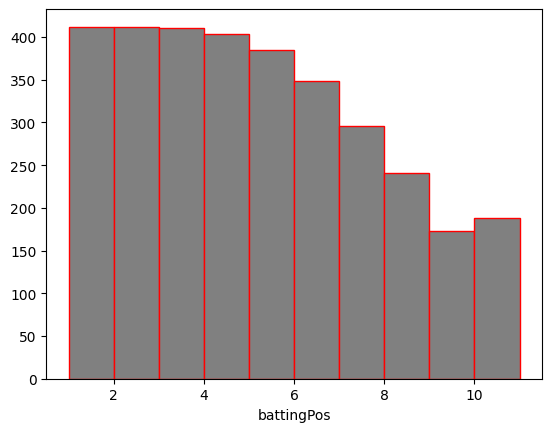

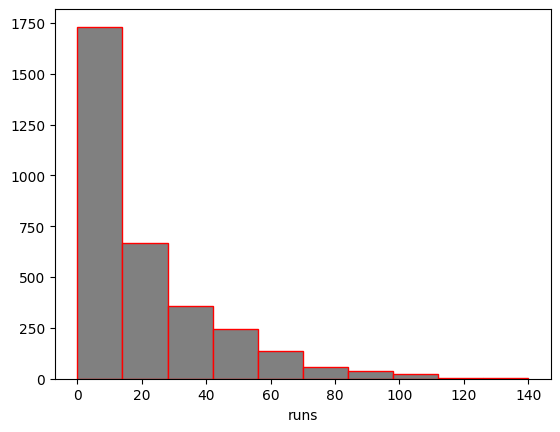

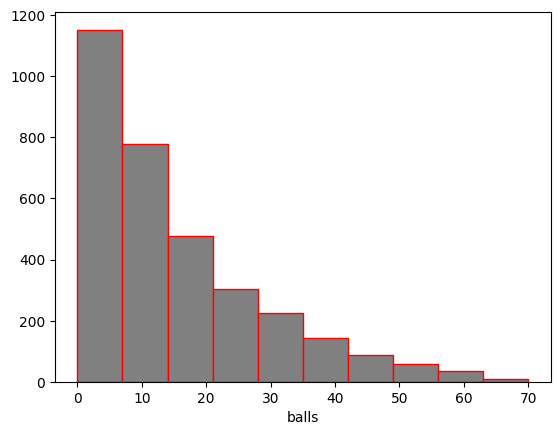

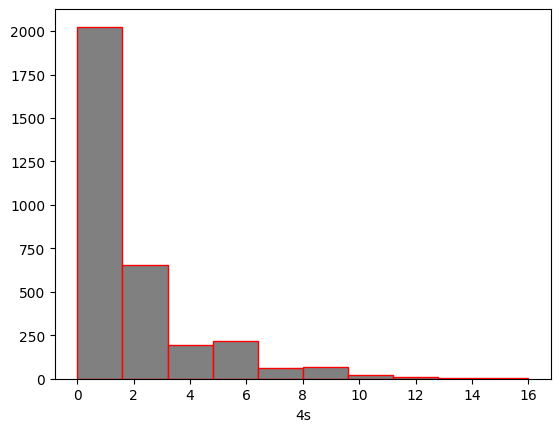

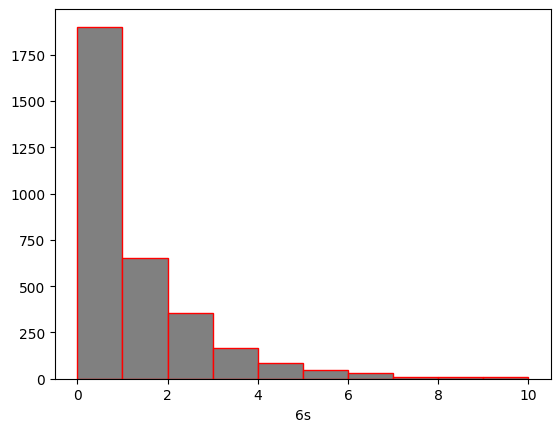

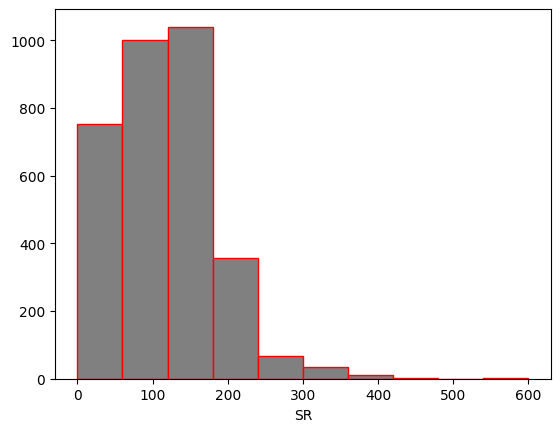

In [33]:
for i in df2.columns:
    plt.hist(df2[i],bins=10,edgecolor='r',color='grey')
    plt.xlabel(i)
    plt.show()


In [34]:
df2.describe()

,battingPos,runs,balls,4s,6s,SR
count,3268.000000,3268.000000,3268.000000,3268.000000,3268.000000,3268.000000
mean,4.772032,19.820073,14.700734,1.744798,0.875459,112.396322
std,2.714852,21.885699,13.516978,2.329142,1.426316,71.512404
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,4.000000,0.000000,0.000000,66.660000
50%,4.000000,12.000000,10.000000,1.000000,0.000000,113.630000
75%,7.000000,29.000000,21.000000,3.000000,1.000000,153.637500
max,11.000000,140.000000,70.000000,16.000000,10.000000,600.000000


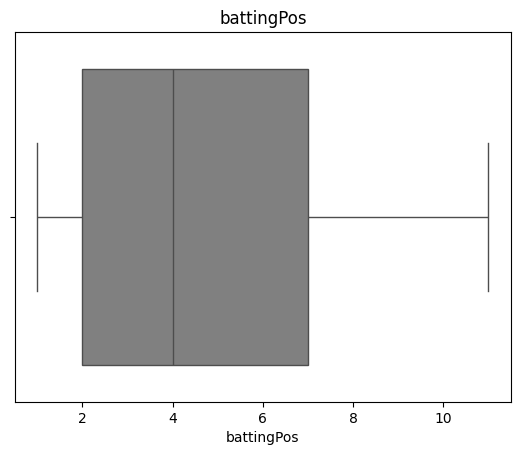

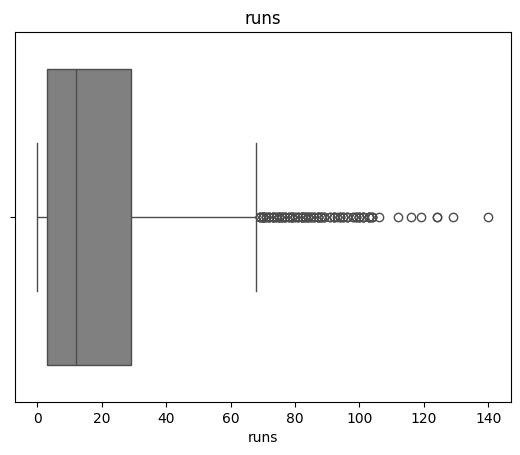

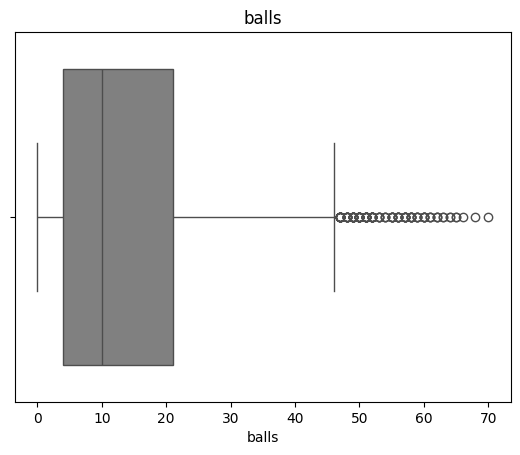

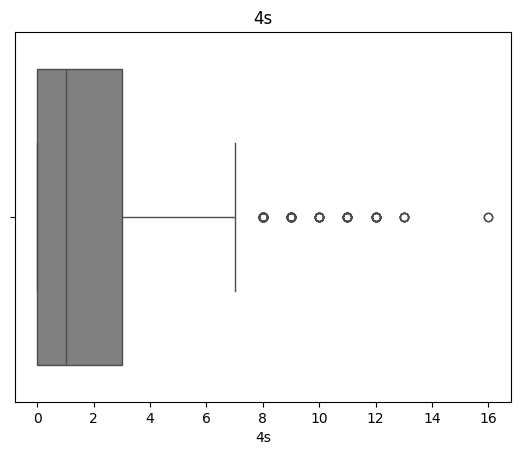

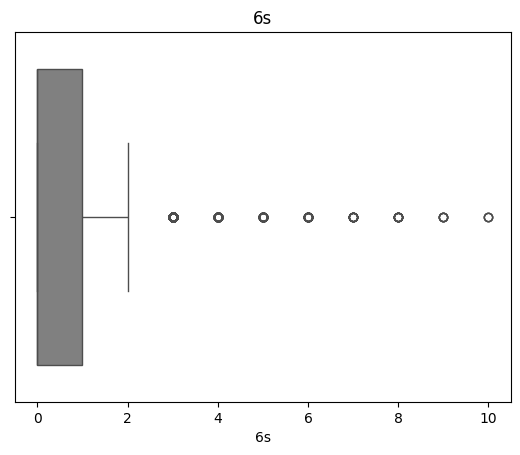

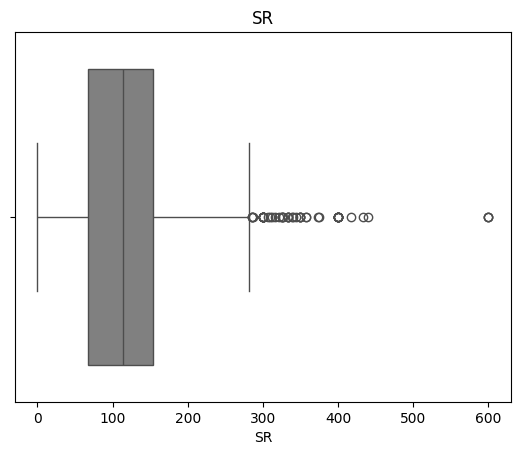

In [35]:
for i in df2.columns:
    sns.boxplot(data=df2, x=i,color='grey',)
    plt.title(i)
    plt.show()

In [36]:
Q1=df2['6s'].quantile(0.25)
Q3=df2['6s'].quantile(0.75)

IQR=Q3-Q1 # Inter_quartile_range

lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
print(Q1,Q3)
print(lower_bound,upper_bound)
df_clean = df[(df2['6s'] >= lower_bound) & (df2['6s'] <= upper_bound)]


0.0 1.0
-1.5 2.5


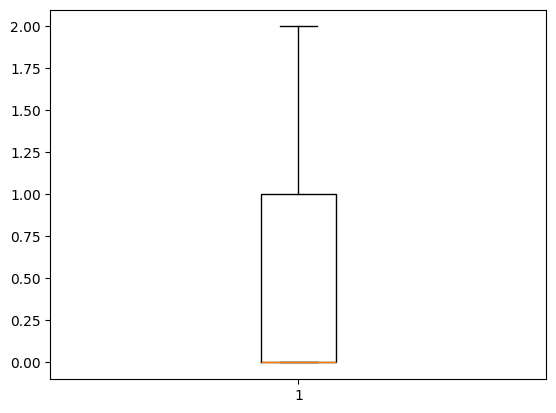

In [37]:
plt.boxplot(df_clean['6s'])
plt.show()

In [38]:
df1.columns

Index(['matchID', 'match', 'team', 'batsman', 'out_status'], dtype='object')

/tmp/ipython-input-2699290296.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=i, palette='bright')


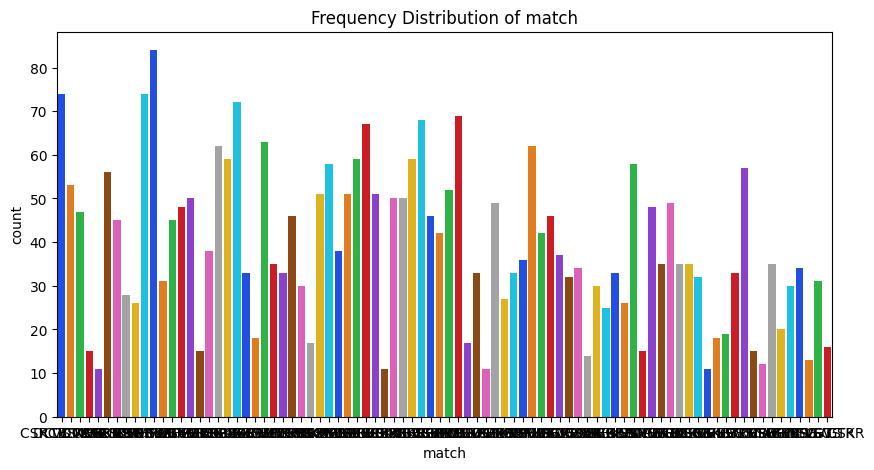

/tmp/ipython-input-2699290296.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=i, palette='bright')


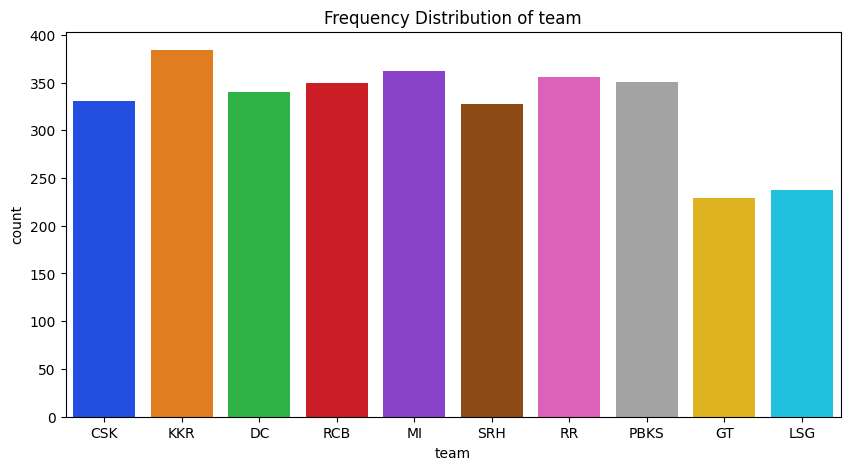

/tmp/ipython-input-2699290296.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=i, palette='bright')


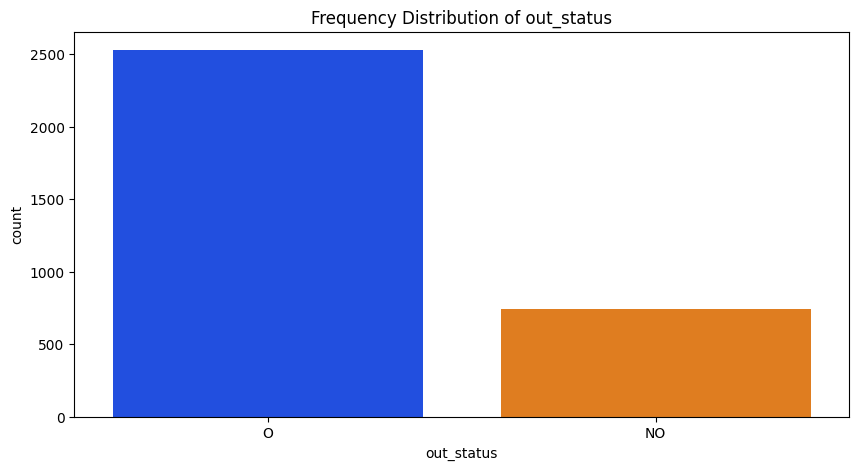

In [39]:
for i in df1.columns:
    if i in ['match','team','out_status']:
        plt.figure(figsize=(10, 5)) #(width,height)
        sns.countplot(data=df, x=i, palette='bright')
        plt.title(f'Frequency Distribution of {i}')
        plt.show()

In [40]:
df1['team'].value_counts()

,count
team,
KKR,384
MI,362
RR,356
PBKS,351
RCB,350
DC,340
CSK,331
SRH,328
LSG,237


In [41]:
df1

,matchID,match,team,batsman,out_status
0,T203817,CSK VS KKR,CSK,Ruturaj Gaikwad,O
1,T203817,CSK VS KKR,CSK,Fafdu Plessis,O
2,T203817,CSK VS KKR,CSK,Robin Uthappa,O
3,T203817,CSK VS KKR,CSK,Moeen Ali,NO
4,T203817,CSK VS KKR,KKR,Shubman Gill,O
...,...,...,...,...,...
3263,T201566,CSK VS GT,GT,Sai Sudharsan,O
3264,T201566,CSK VS GT,GT,Hardik Pandya,O
3265,T201566,CSK VS GT,GT,Vijay Shankar,O
3266,T201566,CSK VS GT,GT,Rahul Tewatia,NO


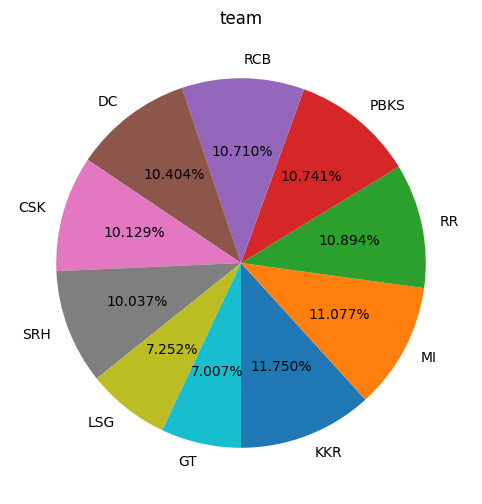

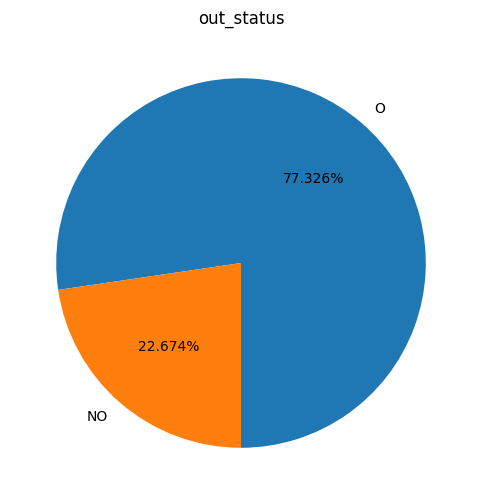

In [45]:
for i in obj_columns:
    if i in ['team','out_status']:
        plt.figure(figsize=(10, 6))
        counts=df[i].value_counts()
        plt.pie(counts,labels=counts.index,autopct='%.3f%%',startangle=270)
        plt.title(i)

Text(0, 0.5, 'runs')

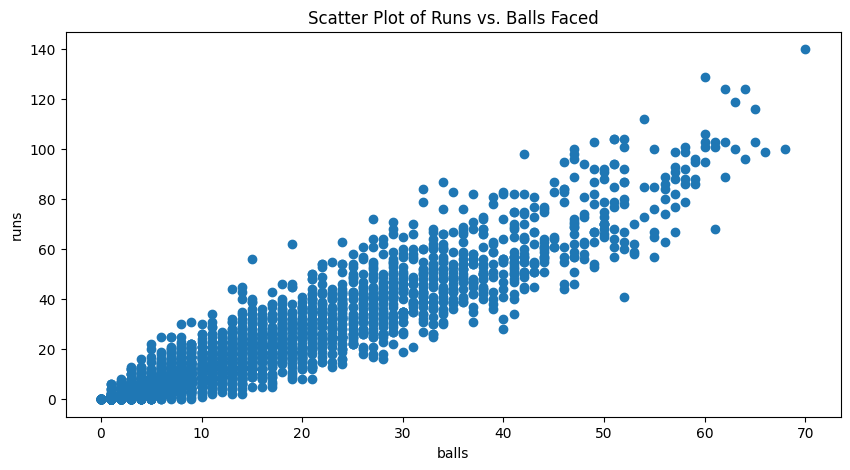

In [46]:
plt.figure(figsize=(10, 5))
plt.scatter(df2['balls'],df2['runs'])
plt.title('Scatter Plot of Runs vs. Balls Faced')
plt.xlabel('balls')
plt.ylabel('runs')

Text(0, 0.5, 'Runs Scored')

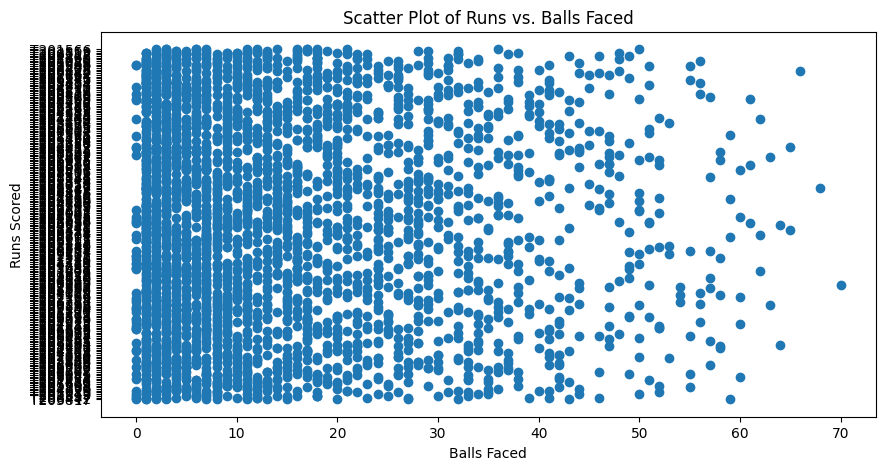

In [49]:
plt.figure(figsize=(10, 5))
plt.scatter(df2['balls'],df1['matchID'])
plt.title('Scatter Plot of Runs vs. Balls Faced')
plt.xlabel('Balls Faced')
plt.ylabel('Runs Scored')

<Axes: ylabel='out_status'>

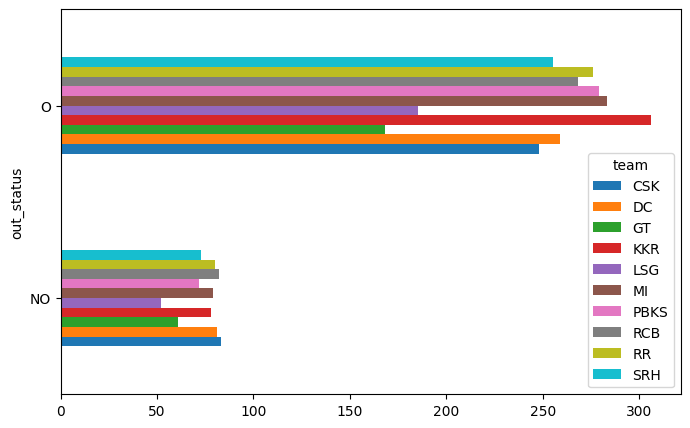

In [50]:
pd.crosstab(columns=df1['team'],index=df1['out_status']).plot(kind='barh',figsize=(8,5))

<Axes: ylabel='count'>

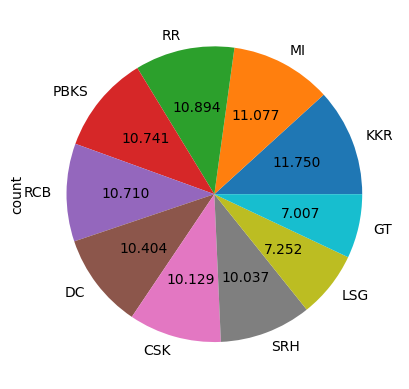

In [56]:
df1['team'].value_counts().plot(kind='pie',autopct="%.3f",startangle = 0)

In [57]:
df.groupby('team')['6s'].sum().reset_index()

,team,6s
0,CSK,351
1,DC,236
2,GT,203
3,KKR,336
4,LSG,226
5,MI,316
6,PBKS,320
7,RCB,288
8,RR,339
9,SRH,246


   team   6s
0   CSK  351
1    DC  236
2    GT  203
3   KKR  336
4   LSG  226
5    MI  316
6  PBKS  320
7   RCB  288
8    RR  339
9   SRH  246


([<matplotlib.patches.Wedge at 0x7bafa366f650>,
 [Text(-0.4135475778919579, 1.01930289944633, 'CSK'),
  Text(-0.9430257237540812, 0.5663059988540571, 'DC'),
  Text(-1.09810238255996, 0.06458449826497904, 'GT'),
  Text(-0.9473508338563736, -0.5590406046000898, 'KKR'),
  Text(-0.4491011555222038, -1.0041454835374313, 'LSG'),
  Text(0.1910796054426997, -1.0832767810600679, 'MI'),
  Text(0.842864849916007, -0.7068089167349738, 'PBKS'),
  Text(1.09949851680291, -0.03321161766913727, 'RCB'),
  Text(0.8701395490904129, 0.6729466287223178, 'RR'),
  Text(0.29353967848339696, 1.0601105872294003, 'SRH')],
 [Text(-0.2255714061228861, 0.5559833996979981, '12.3'),
  Text(-0.5143776675022261, 0.308894181193122, '8.2'),
  Text(-0.5989649359417963, 0.03522790814453402, '7.1'),
  Text(-0.5167368184671128, -0.30493123887277623, '11.7'),
  Text(-0.2449642666484748, -0.5477157182931442, '7.9'),
  Text(0.10422523933238163, -0.5908782442145825, '11.0'),
  Text(0.4597444635905492, -0.38553213640089473, '11.2'

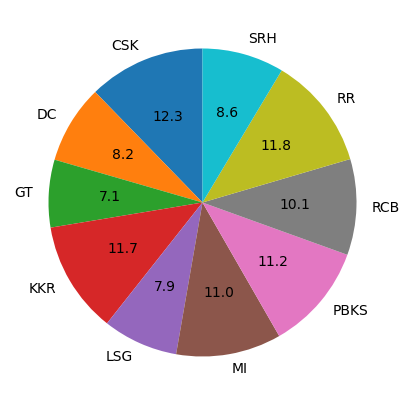

In [63]:
plt.figure(figsize=(10, 5))
team_sixes = df.groupby('team')['6s'].sum().reset_index()
print(team_sixes)
plt.pie(team_sixes['6s'], labels=team_sixes['team'], autopct='%1.1f', startangle=90)


   team   4s
0   CSK  611
1    DC  631
2    GT  508
3   KKR  599
4   LSG  365
5    MI  619
6  PBKS  582
7   RCB  614
8    RR  650
9   SRH  523


([<matplotlib.patches.Wedge at 0x7bafa360e090>,
 [Text(-0.36334787645603156, 1.03825734799947, 'CSK'),
  Text(-0.9378566865160438, 0.5748259176108426, 'DC'),
  Text(-1.0966823628012867, -0.08536858392047555, 'GT'),
  Text(-0.8500468093637166, -0.6981550127948416, 'KKR'),
  Text(-0.3793211368050492, -1.0325286800728226, 'LSG'),
  Text(0.2078339675946309, -1.0801875031279866, 'MI'),
  Text(0.8277062557323059, -0.724501452187369, 'PBKS'),
  Text(1.0980169590949633, -0.0660208871483114, 'RCB'),
  Text(0.8846888708898244, 0.6537014622315661, 'RR'),
  Text(0.3126008785947858, 1.0546471877845065, 'SRH')],
 [Text(-0.198189750794199, 0.5663221898178926, '10.7'),
  Text(-0.5115581926451148, 0.3135414096059141, '11.1'),
  Text(-0.5981903797097926, -0.046564682138441206, '8.9'),
  Text(-0.4636618960165726, -0.3808118251608226, '10.5'),
  Text(-0.20690243825729956, -0.5631974618579032, '6.4'),
  Text(0.11336398232434412, -0.5891931835243563, '10.9'),
  Text(0.45147613949034865, -0.3951826102840194,

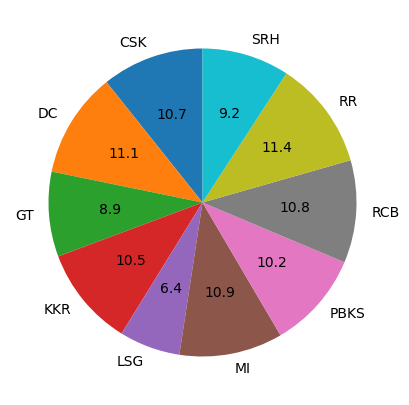

In [62]:
plt.figure(figsize=(10, 5))
team_sixes = df.groupby('team')['4s'].sum().reset_index()
print(team_sixes)
plt.pie(team_sixes['4s'], labels=team_sixes['team'], autopct='%1.1f', startangle=90)


In [66]:
team_out_counts = df.groupby(['team', 'out_status']).size().reset_index(name='count')
print(team_out_counts)

    team out_status  count
0    CSK         NO     83
1    CSK          O    248
2     DC         NO     81
3     DC          O    259
4     GT         NO     61
5     GT          O    168
6    KKR         NO     78
7    KKR          O    306
8    LSG         NO     52
9    LSG          O    185
10    MI         NO     79
11    MI          O    283
12  PBKS         NO     72
13  PBKS          O    279
14   RCB         NO     82
15   RCB          O    268
16    RR         NO     80
17    RR          O    276
18   SRH         NO     73
19   SRH          O    255


<Axes: xlabel='team'>

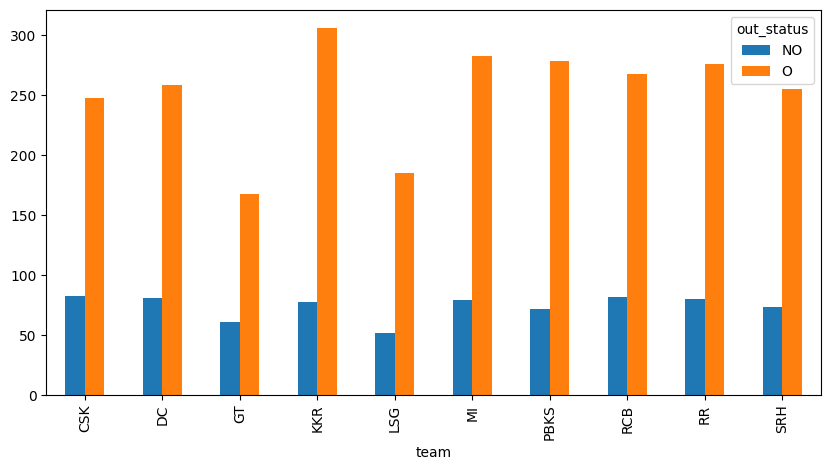

In [67]:
team_out_counts.pivot(index='team', columns='out_status', values='count').plot(
    kind='bar', figsize=(10, 5)
)


In [68]:
team_runs = df.groupby('team')['runs'].sum().reset_index()

In [69]:
print(team_runs)

   team  runs
0   CSK  7372
1    DC  6518
2    GT  5423
3   KKR  6870
4   LSG  4612
5    MI  6937
6  PBKS  6670
7   RCB  7028
8    RR  7181
9   SRH  6161


Text(0, 0.5, 'runs')

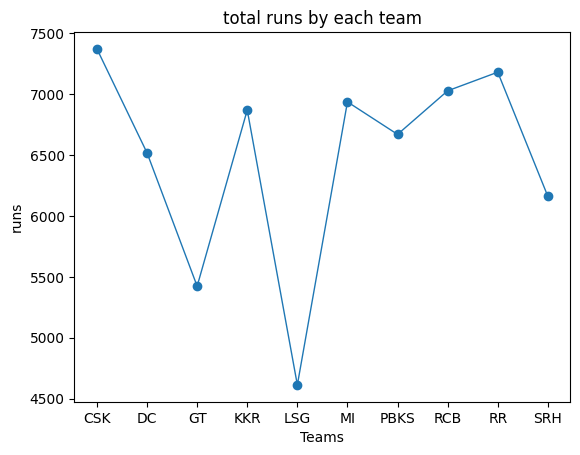

In [70]:
plt.plot(team_runs['team'].astype('str'),team_runs['runs'],marker='o',linewidth = 1)
plt.title('total runs by each team')
plt.xlabel('Teams')
plt.ylabel('runs')

In [72]:
df2.corr()

,battingPos,runs,balls,4s,6s,SR
battingPos,1.000000,-0.393126,-0.455317,-0.416404,-0.201001,-0.104767
runs,-0.393126,1.000000,0.936805,0.862815,0.792536,0.515570
balls,-0.455317,0.936805,1.000000,0.807365,0.633254,0.341131
4s,-0.416404,0.862815,0.807365,1.000000,0.473786,0.434769
6s,-0.201001,0.792536,0.633254,0.473786,1.000000,0.536901
SR,-0.104767,0.515570,0.341131,0.434769,0.536901,1.000000


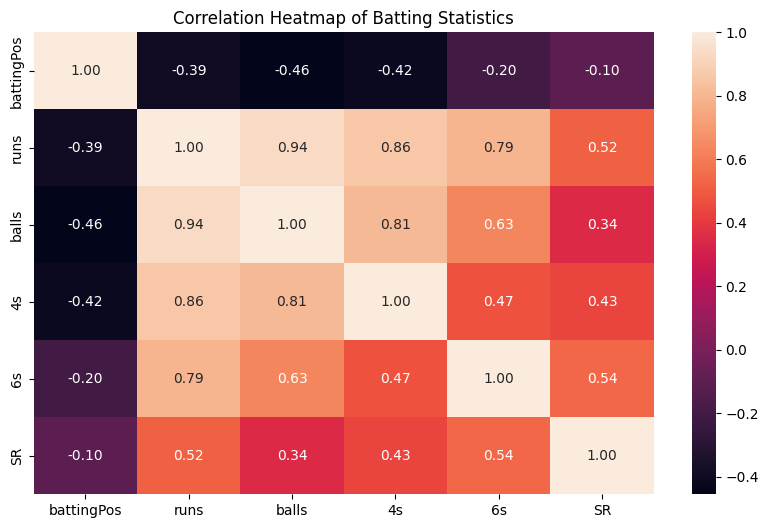

In [73]:
correlation_matrix = df2.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix,annot=True,fmt=".2f")
plt.title('Correlation Heatmap of Batting Statistics')
plt.show()